# Plotting with PROC FREQ

Let's review the `proc freq` step. Recall that the `PROC FREQ` procedure generates frequency tables for categorical variables, showing the counts, percentages, and relationships between categories.

:::{admonition} *General `PROC FREQ` syntax*:
:class: tip
```
PROC FREQ DATA=input-table <options>;
    TABLES column-name(s) / <table-options>;
RUN;
```
```
Let's look at an example below: 


In [35]:
proc freq data=sashelp.cars;
    tables Origin; 
run;

Origin,Frequency,Percent,CumulativeFrequency,CumulativePercent
Asia,158,36.92,158,36.92
Europe,123,28.74,281,65.65
USA,147,34.35,428,100.00


The previous code above uses a `proc freq` procedure on the `sashelp.cars` dataset and creates a frequency table for the variable `Origin`. The output contains each unique value of Origin, it's frequency, percent, cumulative frequency, and cumulative percent.

This is a very simple `proc freq` statement with no other options included.

We can extend it further by adding in options to display frequencies!

### Example 1

Origin,Frequency,Percent,CumulativeFrequency,CumulativePercent
Asia,158,36.92,158,36.92
Europe,123,28.74,281,65.65
USA,147,34.35,428,100.00

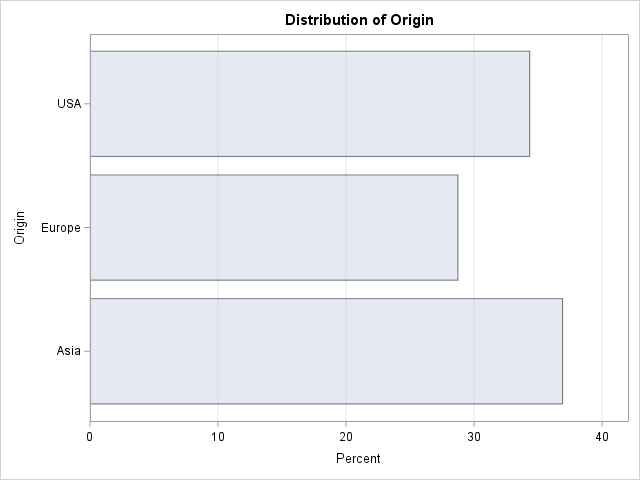

In [43]:
ods graphics on;

proc freq data = sashelp.cars;
    tables Origin / 
        plots = freqplot(orient=horizontal scale=percent);
run;

:::{admonition} (ex.1) Code Breakdown:
:class: important

The code above does two things: 
- create a frequency table for the variable `Origin`
- create a frequnecy plot, more specifically a horizontal barchart, for the variable `Origin`

Additionally, 
- `ods graphics on`: enables SAS's ODS for graphics and allows visual outputs such as charts and plots    (this is enabled for the whole SAS session)
- The section after `tables Origin` starts with a `/` which indicates the `options` specified for this procedure, in this case a plot!
  - `plots = freqplot` tells SAS to create a frequencyh plot (bar chart)
  - `orient = horizontal` sets the bars to be horizontal rather than vertical
  - `scale = percent` bar will represent percentages rather than counts
:::

### Example 2


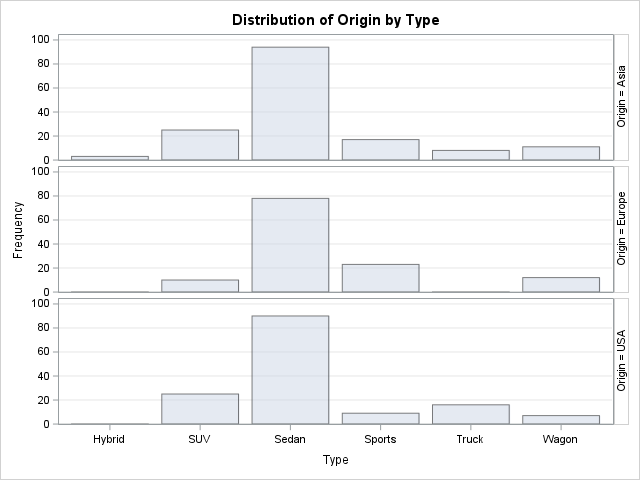

In [53]:
proc freq data = sashelp.cars;
    tables Origin*Type /
        plots = freqplot(orient=vertical);
run;

:::{admonition} (ex.2) Code Breakdown:
:class: important

The code above is very similar to the previous example, except this time it is
- creating a two way frequency report for Origin and Type, giving you the counts of each car type by origin
- creates a vertical two way frequency plot
:::
Please note, since the `scale` was not specified, the default behavior will show counts and NOT percentages.

### Example 3


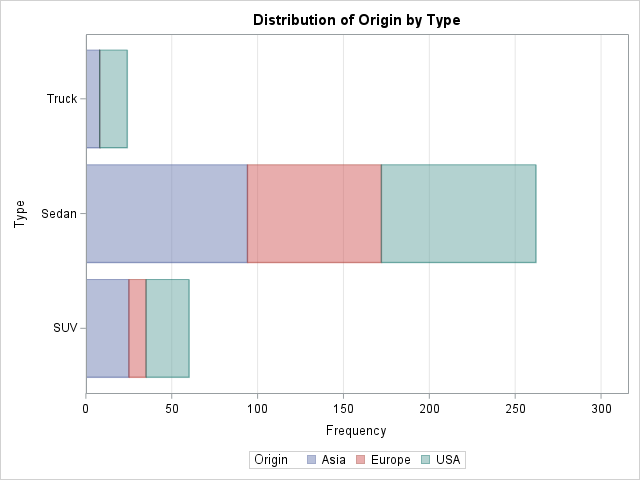

In [62]:
title1 'Origin of Cars by Type';
title2 `Sedan, SUV, Truck`;
footnote `Other Types not included: Hybrid, Sports, Wagon`;
proc freq data=sashelp.cars;
    tables Origin*Type /
        plots = freqplot(twoway=stacked orient=horizontal);
    where Type IN ('Sedan', 'SUV', 'Truck');
run;

:::{admonition} (ex.3) Code Breakdown:
:class: important

The code above extends the `proc freq` step and also customizes the frequency report with titles and a footnote. More specifically, 
- `title1` and `title2` creates a main title and subtitle.
- `footnote` specifies a footnote to be at the bottom of the report.
- `plots=freqplot(twoway=stacked orient=horizontal)` creates a stacked horizontal bar plot where it will display each Origin category by Type.
- `where` as we previously learned, the `WHERE` statement filters our report/output to only include car types that are either `Sedan`, `SUV`, or `Truck`.
:::